# Estadística descriptiva y visualización

## Exploración inicial

El dataset es considerado de dominio público y ha sido publicado en el Kraggle y en GitHub, accesible usando las siguientes ligas:

* https://www.kaggle.com/mirichoi0218/insurance/home
* https://github.com/stedy/Machine-Learning-with-R-datasets

Por conveniencia, he copiado el dataset en el directorio del curso. De hecho, a estas alturas, ya debes tener una copia del mismo en tu instancia de Gitpod.

Cree un archivo para el ejercicio de hoy en Gitpod y agreguemos la siguiente "celda"

1. Item 1
2. Item 2

In [2]:
import pandas as pd

df = pd.read_csv("housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Lo anterior debe ser ya conocido: nos muestra los primeros 5 renglones del dataset. Recuerda que cada renglón corresponde a una observación, mientras que cada columna corresponde a una variable, usando el vocabulario de estadística.

Usemos el siguiente comando para calcular los valores estadísticos de las variables numéricas del dataset.

In [3]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [4]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# sns.set_theme(style="white")

### Exploración de variables que afectan el valor de una casa



<Axes: xlabel='median_income', ylabel='median_house_value'>

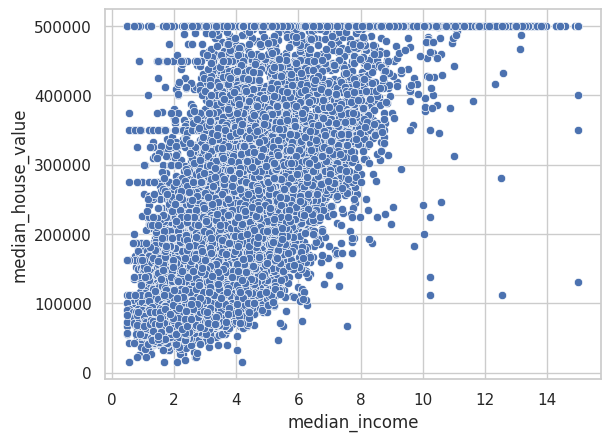

In [5]:
# 1. Gráfico de Dispersión
sns.scatterplot(x='median_income', y='median_house_value', data=df)


<Axes: xlabel='median_income', ylabel='median_house_value'>

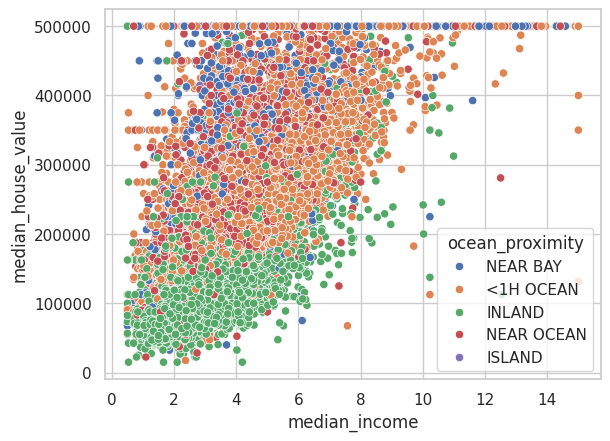

In [6]:
# 1. Gráfico de Dispersión
sns.scatterplot(x='median_income', y='median_house_value', data=df,hue='ocean_proximity')

<Axes: xlabel='median_income', ylabel='median_house_value'>

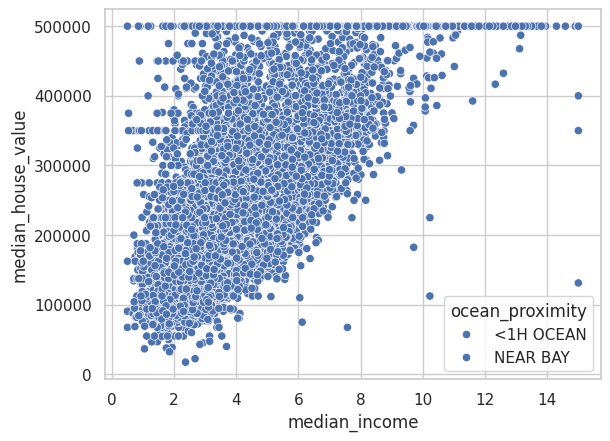

In [7]:
sns.scatterplot(x='median_income', y='median_house_value', data=df[df.ocean_proximity == '<1H OCEAN'],hue='ocean_proximity')
sns.scatterplot(x='median_income', y='median_house_value', data=df[df.ocean_proximity == 'NEAR BAY'],hue='ocean_proximity')

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

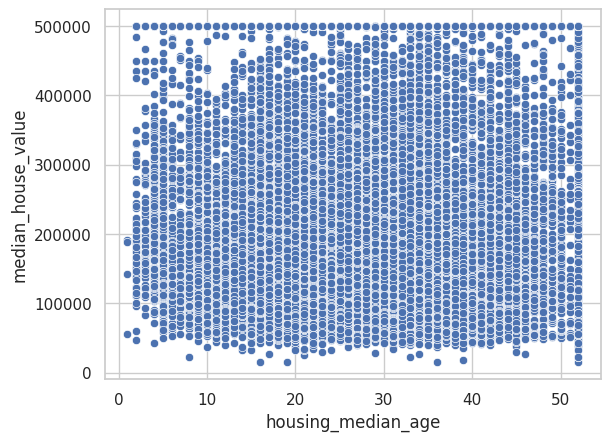

In [8]:
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df)

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

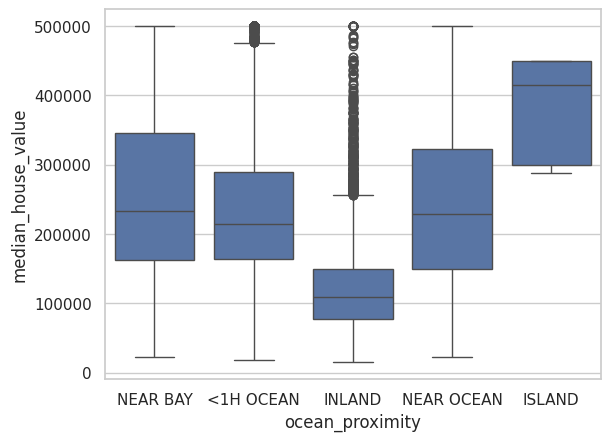

In [9]:
# 2. Diagrama de Cajas
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)


<Axes: >

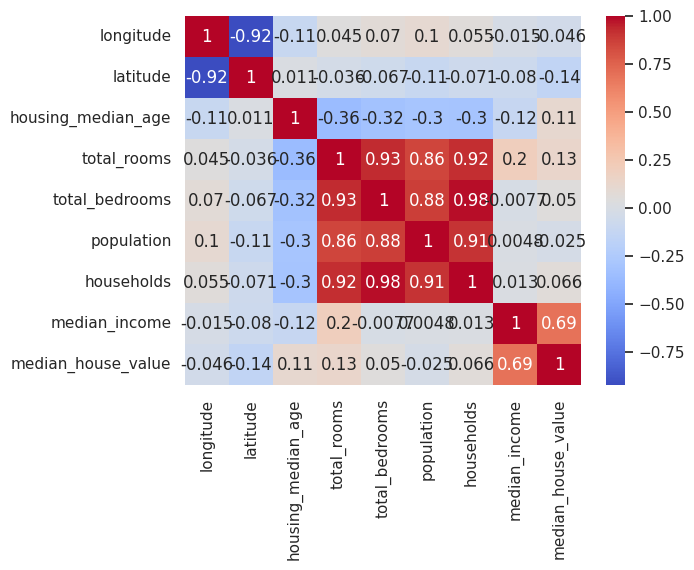

In [10]:
# 3. Gráfico de Correlación
corr_matrix = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='longitude', ylabel='latitude'>

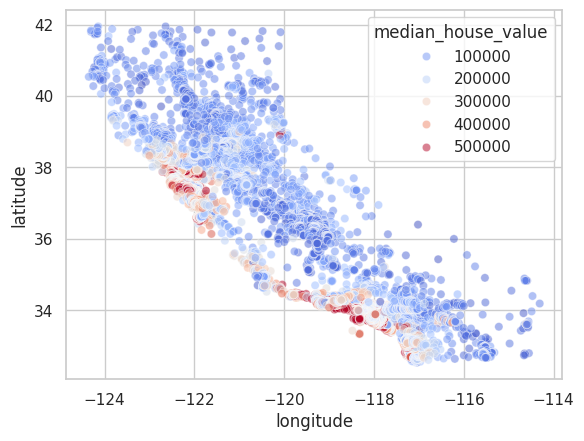

In [11]:
# 4. Mapa de Calor de Correlación Geoespacial 
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df, palette='coolwarm', alpha=0.5)


<Axes: xlabel='longitude', ylabel='latitude'>

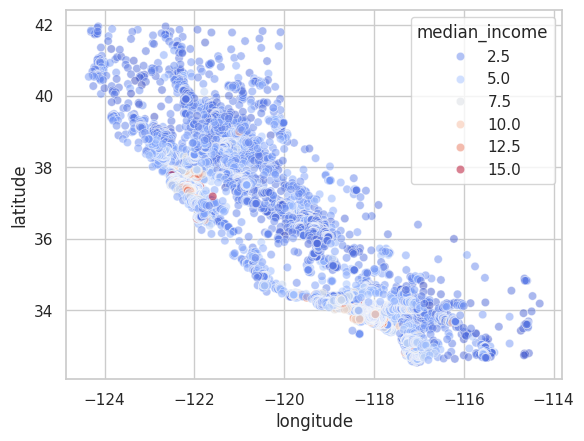

In [12]:
sns.scatterplot(x='longitude', y='latitude', hue='median_income', data=df, palette='coolwarm', alpha=0.5)

In [13]:
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

Number of clusters suggested by knee method: 3


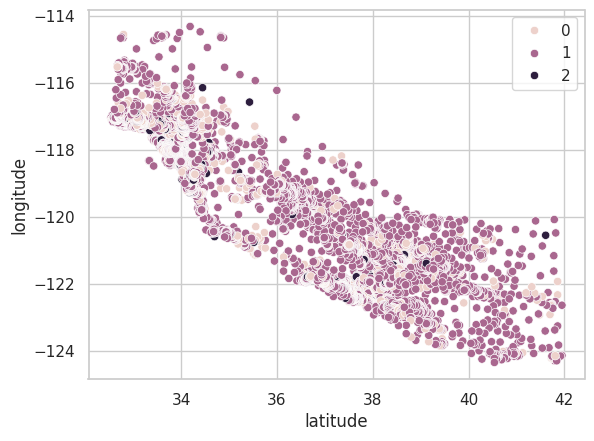

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
#"longitude","latitude","housing_median_age","total_rooms","population","households","median_income"
dfp = df[["median_income","households"]]

ssd = []
ks = range(1,11)
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km = km.fit(dfp)
    ssd.append(km.inertia_)

kneedle = KneeLocator(ks, ssd, S=1.0, curve="convex", direction="decreasing")
# kneedle.plot_knee()
# plt.show()

k = round(kneedle.knee)

print(f"Number of clusters suggested by knee method: {k}")
# %%

kmeans = KMeans(n_clusters=k).fit(df[["median_income","households"]])
sns.scatterplot(data=df, x="latitude", y="longitude", hue=kmeans.labels_)
plt.show()

In [28]:
import plotly.express as px
fig = px.scatter(df, x="latitude", y="longitude", color=kmeans.labels_.astype(str))
fig.show()

In [16]:
cluster0 = df[kmeans.labels_ == 0]

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_text

tree = DecisionTreeClassifier()
tree.fit(df[["median_income","households"]], kmeans.labels_)
print(export_text(tree, feature_names=["median_income","households"]))


|--- households <= 554.50
|   |--- class: 1
|--- households >  554.50
|   |--- households <= 1360.50
|   |   |--- class: 0
|   |--- households >  1360.50
|   |   |--- class: 2

